In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading datasets and getting some info

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Feature importance

### Heatmaps

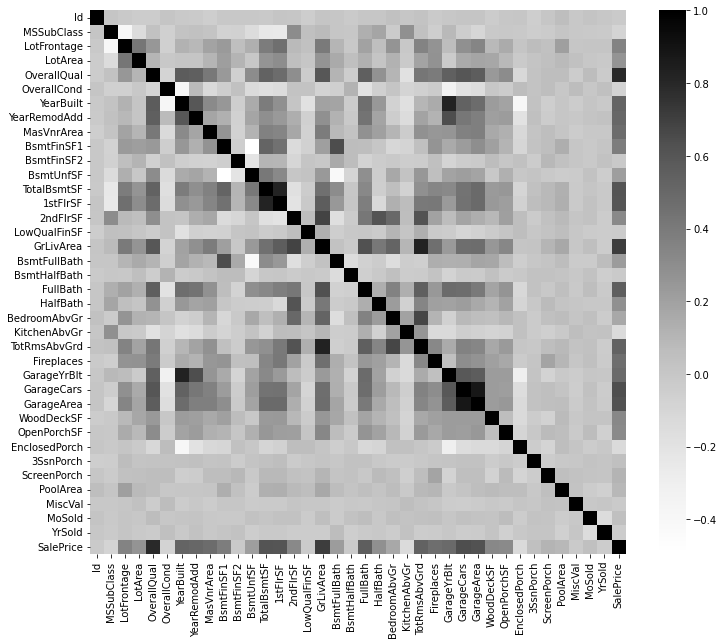

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(), cmap='Greys')
plt.show()

In [6]:
df_corr = train_df.corr()
cols = df_corr.nlargest(10, 'SalePrice')['SalePrice'].index

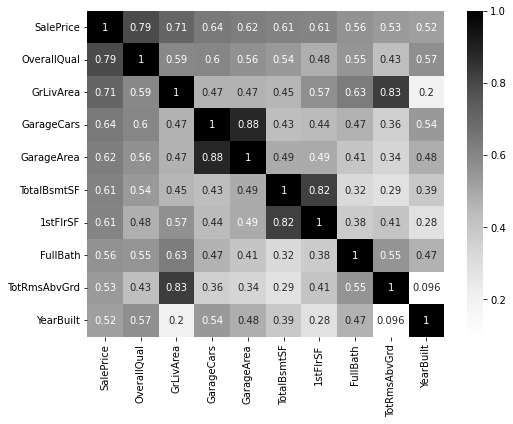

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df[cols].corr(), cmap='Greys', annot=True)
plt.show()

Based on heatmap which is shown above, these columns are highly correlated with the dependent column which is SalePrice.
There are some other information that we can extract from this heatmap: <br>
GrLivArea and TotRmsAbvGrd, GarageArea and GarageCars(huh! makes sense), TotalBsmtSF and 1stFlrSf have the same effect on producing SalePrice; so we can drop one per each pair.

In [8]:
df = train_df[cols].drop(['TotRmsAbvGrd', 'GarageCars', '1stFlrSF'], axis=1)
df['Id'] = train_df['Id']
df

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,Id
0,208500,7,1710,548,856,2,2003,1
1,181500,6,1262,460,1262,2,1976,2
2,223500,7,1786,608,920,2,2001,3
3,140000,7,1717,642,756,1,1915,4
4,250000,8,2198,836,1145,2,2000,5
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,2,1999,1456
1456,210000,6,2073,500,1542,2,1978,1457
1457,266500,7,2340,252,1152,2,1941,1458
1458,142125,5,1078,240,1078,1,1950,1459


### PairPlot

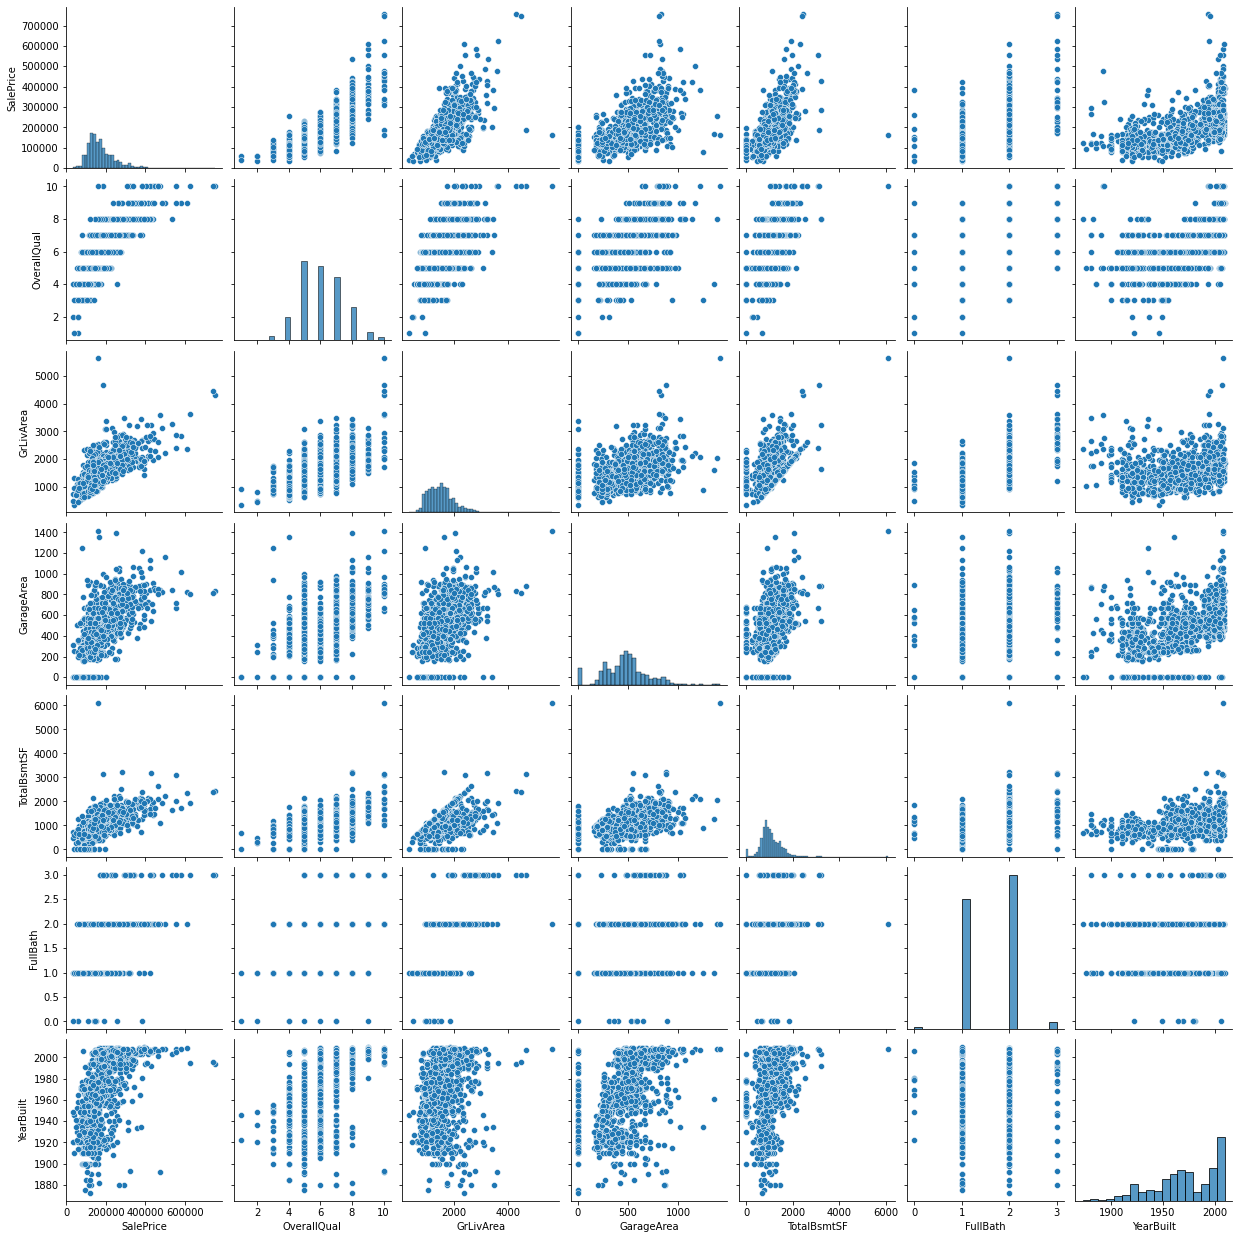

In [10]:
sns.pairplot(df.loc[:, df.columns != 'Id'])
plt.show()

## Outliers

In [14]:
df['SalePrice'].mean()

180921.19589041095

In [13]:
df['SalePrice'].sort_values(ascending=False)

691     755000
1182    745000
1169    625000
898     611657
803     582933
         ...  
30       40000
533      39300
968      37900
916      35311
495      34900
Name: SalePrice, Length: 1460, dtype: int64

Some values are way different from the rest of values. The mean of SalePrice is something about 181000, but there are two values which are about 700000! we should find out the feature which is messing up the prices.

### Scatter plot for recognizing outliers

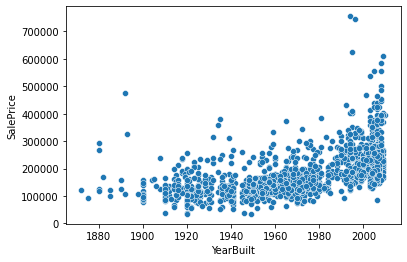

In [15]:
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'])
plt.show()

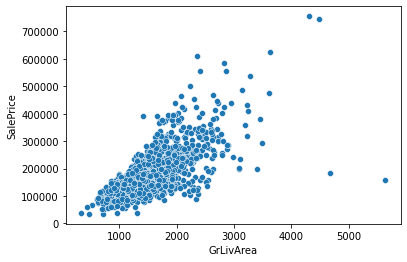

In [16]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.show()

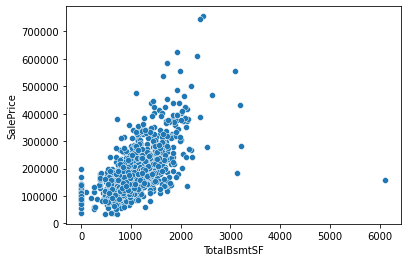

In [17]:
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.show()

Bases on what we just saw above, I decided to get rid of not only those two high sale prices, but also some of them which don't make sense.

### Dropping outliers

In [27]:
# indexes came from sorting values of SalePrice

df.drop(df.index[[691, 1182]], inplace=True)

In [34]:
# i consider those as outliers

df.drop(df[df['GrLivArea']>4000].index, inplace=True)

In [35]:
df.drop(df[df['TotalBsmtSF']>4000].index, inplace=True)